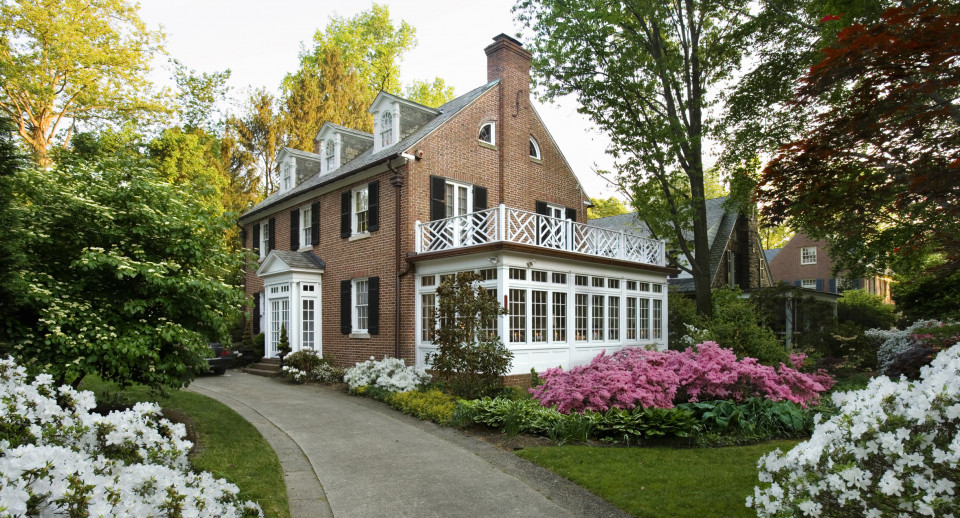

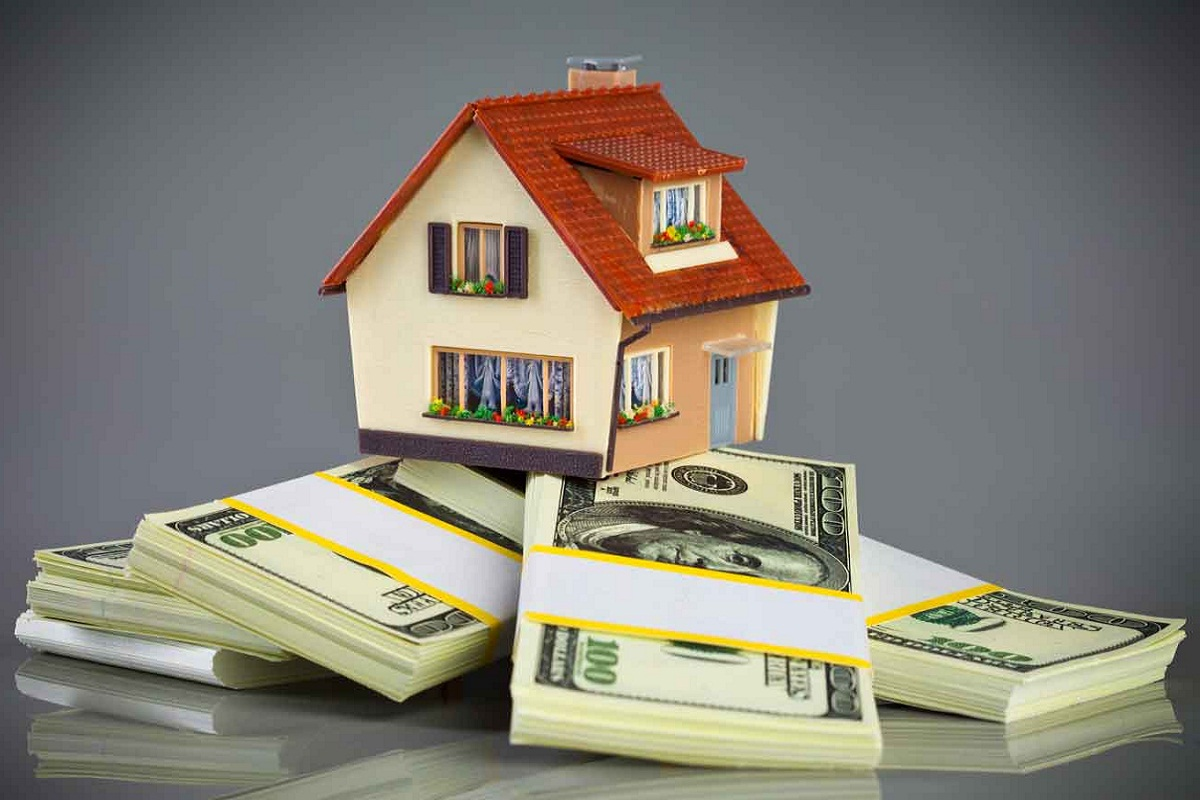

## THE GOAL

* **This notebook shares a study and explaines advanced regression techniques used to predict house prices.**

* **Each feature of the dataset represents a different attribute of each house**
 
* **The goal is to predict the values for SalePrice feature by applying advanced regression models**

## THE METHOD

* **Cross Validation: Using 5-fold cross-validation**

* **4 different advanced regression models were used to predict house prices. Models were XGBoost, LightGBM, Gradient Boosting, Random Forest**

* **Root Mean Squared Error (RMSE) was used as the metric to evaluate the models success**

## IMPORTING PACKAGES AND DATASETS

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("husl", 10)
import missingno as msno

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import DataConversionWarning
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

Assuming one has kaggle installed, API etc, run the following once:
```zsh
kaggle competitions download -c house-prices-advanced-regression-techniques
unzip house-prices-advanced-regression-techniques.zip
```

In [151]:
#| hide 
# !cd dev/12_house_price_prediction

9202.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


zsh:cd:1: no such file or directory: dev/12_house_price_prediction


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

## EXPLORATORY DATA ANALYSIS

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


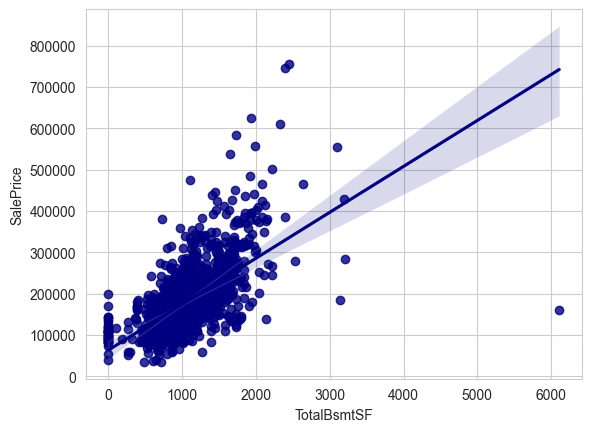

In [ ]:
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', color = 'navy', data = train)
plt.show()

#### **A linear relationship seems to be between TotalBsmtSF and SalePrice features**

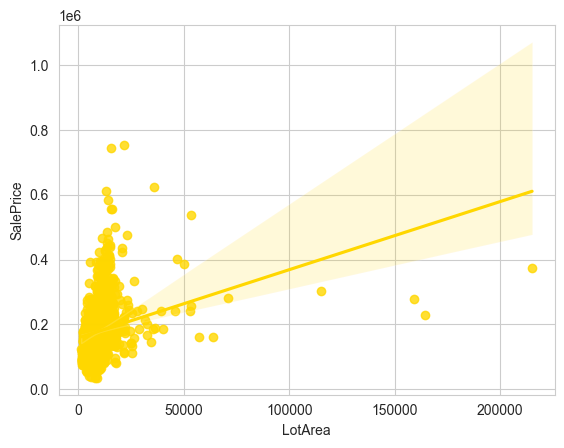

In [ ]:
sns.regplot(x = 'LotArea', y = 'SalePrice', color = 'gold', data = train)
plt.show()

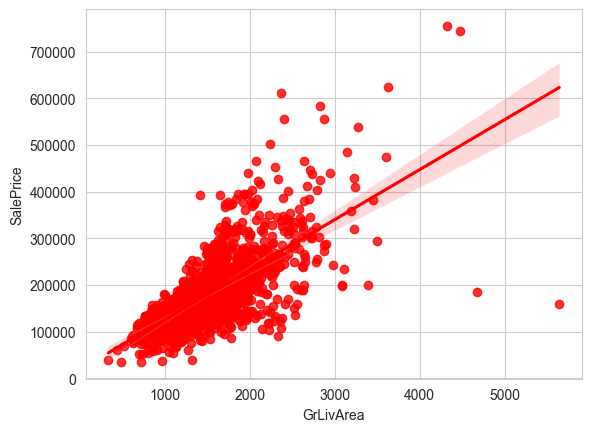

In [ ]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', color = 'red', data = train)
plt.show()

#### **A linear relationship seems to be between GrLivArea and SalePrice features**

Drop two outliers with large GrLivArea and low SalePrice:

In [ ]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Print numeric columns:

In [ ]:
numeric_cols = train.select_dtypes(include=["number"]).columns.tolist()
print(numeric_cols)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Let's plot the Paerson coeficient between numeric columns:

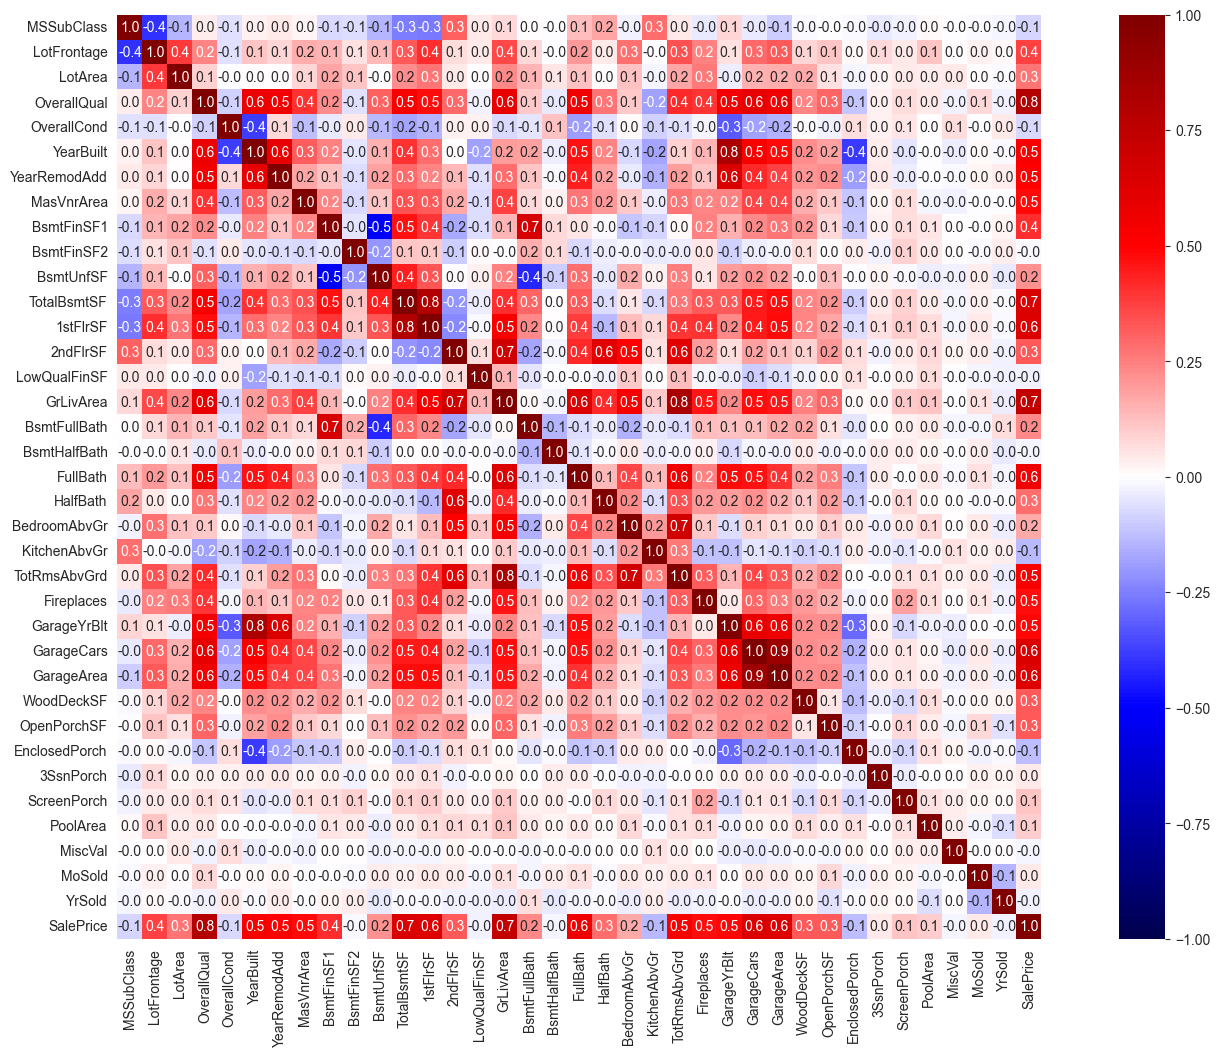

In [ ]:
plt.subplots(figsize=(20,12))
a = sns.heatmap(train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f',square = True)

In [ ]:
df = train.corr()
df = df.where(np.triu(np.ones(df.shape)).astype(bool))  # throw away duplicates
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.405,-0.142,0.033,-0.059,0.028,0.041,0.023,-0.074,-0.066,-0.141,-0.253,-0.263,0.309,0.046,0.077,0.003,-0.002,0.132,0.177,-0.023,0.282,0.040,-0.046,0.085,-0.040,-0.100,-0.013,-0.007,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
LotFrontage,NaN,1.000,0.389,0.235,-0.056,0.117,0.081,0.164,0.147,0.055,0.140,0.323,0.407,0.066,0.042,0.355,0.077,-0.005,0.196,0.042,0.274,-0.004,0.336,0.246,0.061,0.293,0.323,0.082,0.117,0.015,0.075,0.046,0.116,0.005,0.026,0.008,0.371
LotArea,NaN,NaN,1.000,0.091,-0.003,0.007,0.008,0.085,0.175,0.114,-0.003,0.224,0.269,0.041,0.006,0.233,0.147,0.050,0.120,0.007,0.120,-0.017,0.175,0.261,-0.032,0.152,0.164,0.169,0.062,-0.017,0.021,0.045,0.036,0.039,0.006,-0.014,0.268
OverallQual,NaN,NaN,NaN,1.000,-0.090,0.571,0.550,0.403,0.222,-0.058,0.309,0.539,0.469,0.290,-0.030,0.589,0.104,-0.039,0.548,0.270,0.102,-0.184,0.421,0.392,0.547,0.601,0.557,0.237,0.297,-0.113,0.031,0.066,0.045,-0.031,0.073,-0.027,0.796
OverallCond,NaN,NaN,NaN,NaN,1.000,-0.376,0.075,-0.127,-0.043,0.040,-0.137,-0.175,-0.145,0.031,0.025,-0.077,-0.054,0.118,-0.193,-0.060,0.013,-0.087,-0.056,-0.022,-0.324,-0.185,-0.151,-0.003,-0.030,0.070,0.025,0.055,0.002,0.069,-0.004,0.044,-0.078


Let's find the top correlations:

In [ ]:
top_values = df.stack().reset_index() 
top_values.columns = ['Row', 'Column', 'Value']
top_values.drop(top_values[top_values.Value == 1].index, inplace=True)
top_values = top_values.sort_values('Value', ascending=False).head(10)
top_values

,Row,Column,Value
626,GarageCars,GarageArea,0.887
457,GrLivArea,TotRmsAbvGrd,0.829
194,YearBuilt,GarageYrBlt,0.825
353,TotalBsmtSF,1stFlrSF,0.804
141,OverallQual,SalePrice,0.796
471,GrLivArea,SalePrice,0.735
405,2ndFlrSF,GrLivArea,0.695
552,BedroomAbvGr,TotRmsAbvGrd,0.680
276,BsmtFinSF1,BsmtFullBath,0.659
377,TotalBsmtSF,SalePrice,0.651


In [ ]:
# # same but with dictionary:
# d = []
# for col in df.columns:
#     for row in df.index:
#         if not pd.isna(df[col][row]) and df[col][row] < 1.0:
#             d.append((row,col, df[col][row]))
# sorted(d, key=lambda x: x[2], reverse=True)[:10]

So we see that we have high correlation between 'GarageCars', 'GarageArea' (of course) and many more.

Let's look at distributions of all numeric features:

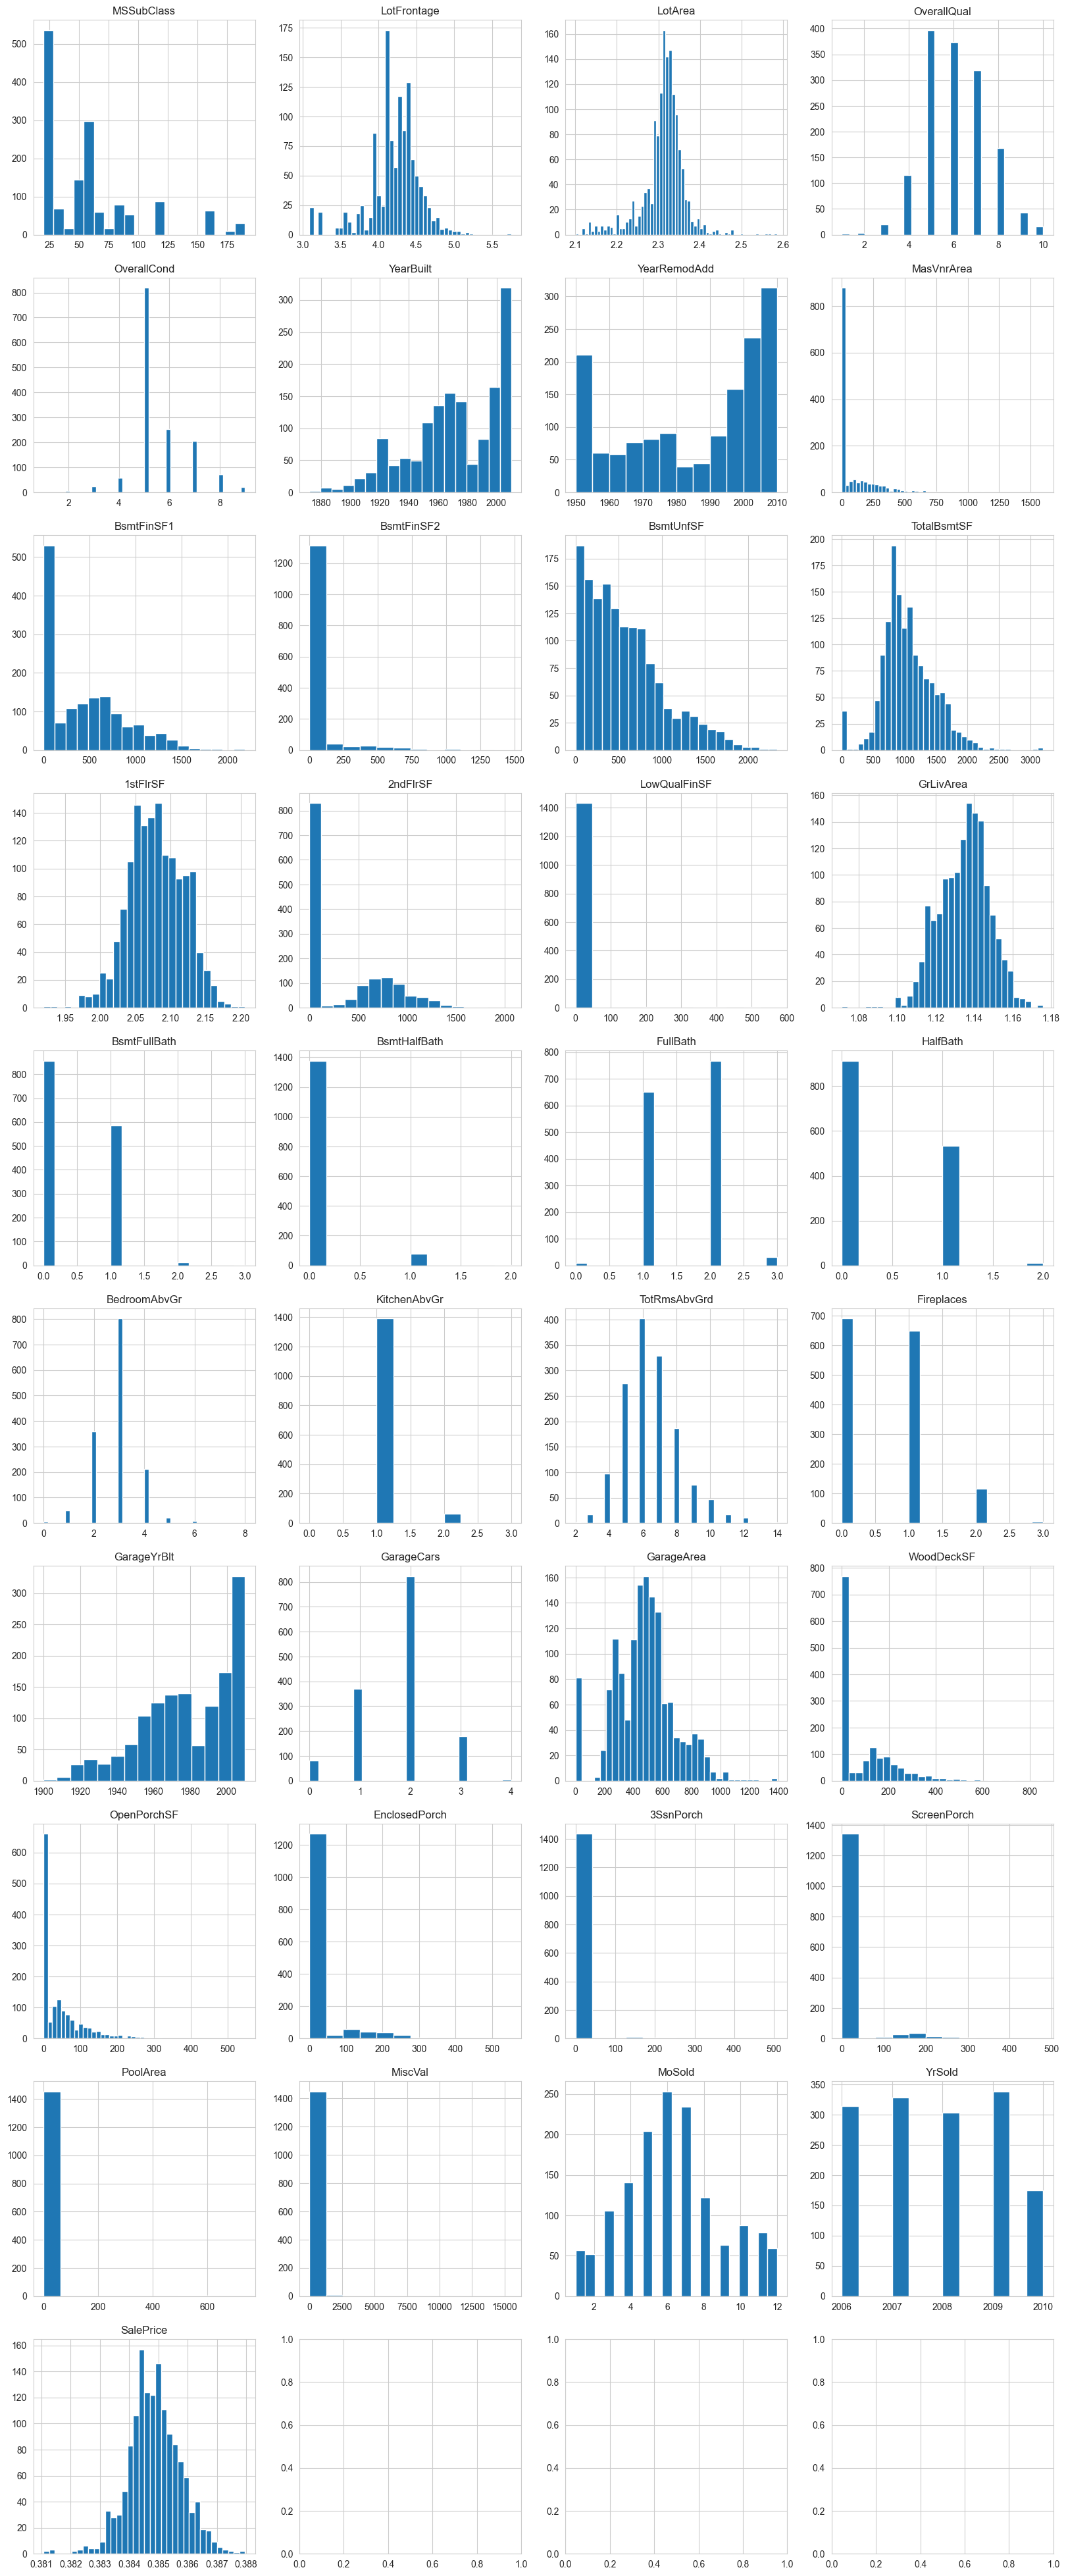

In [181]:
# assuming 'df' is the name of your pandas dataframe
fig, axs = plt.subplots(10, 4, figsize=(20,50)) # 10 rows of 4 subplots each, change figsize or layout to adjust

# loop over every column of the dataframe
for i, column_name in enumerate(numeric_cols):
    # calculate the position in the grid for the ith subplot
    ax_pos = (i // 4, i % 4)
    # plot the histogram of the column in the corresponding subplot
    axs[ax_pos].hist(train[column_name], bins='auto')
    # set the title of the current subplot to the column name
    axs[ax_pos].set_title(column_name)
plt.show() # or savefig() to save the figure to a file

The distribution of the SalePrice, LotFrontage, LotArea, 1stFlrSF, GrLivArea features seems not like Normal Distribution. To convert the distributions to Normal Distribution we use $log(1 + x)$ (`np.log1p`) transformation function in numpy is applied:

In [161]:
for feature in ['SalePrice', 'LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']:
    train[feature] = np.log1p(train[feature])

Let's combine the train and test data to apply the same transformations:

In [184]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
df_new = pd.concat((train, test)).reset_index(drop=True)
df_new.drop(['SalePrice'], axis=1, inplace=True)

## HANDLING MISSING VALUES

In [275]:
missing_counts = df_new.isna().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts.values != 0]
print(list(missing_counts.items()))

[('PoolQC', 2908), ('MiscFeature', 2812), ('Alley', 2719), ('Fence', 2346), ('FireplaceQu', 1420), ('LotFrontage', 486), ('GarageYrBlt', 159), ('GarageFinish', 159), ('GarageQual', 159), ('GarageCond', 159), ('GarageType', 157), ('BsmtExposure', 82), ('BsmtCond', 82), ('BsmtQual', 81), ('BsmtFinType2', 80), ('BsmtFinType1', 79), ('MasVnrType', 24), ('MasVnrArea', 23), ('MSZoning', 4), ('Functional', 2), ('BsmtHalfBath', 2), ('BsmtFullBath', 2), ('Utilities', 2), ('SaleType', 1), ('BsmtFinSF1', 1), ('KitchenQual', 1), ('GarageCars', 1), ('BsmtUnfSF', 1), ('TotalBsmtSF', 1), ('Exterior2nd', 1), ('Exterior1st', 1), ('GarageArea', 1), ('Electrical', 1), ('BsmtFinSF2', 1)]


<Axes: >

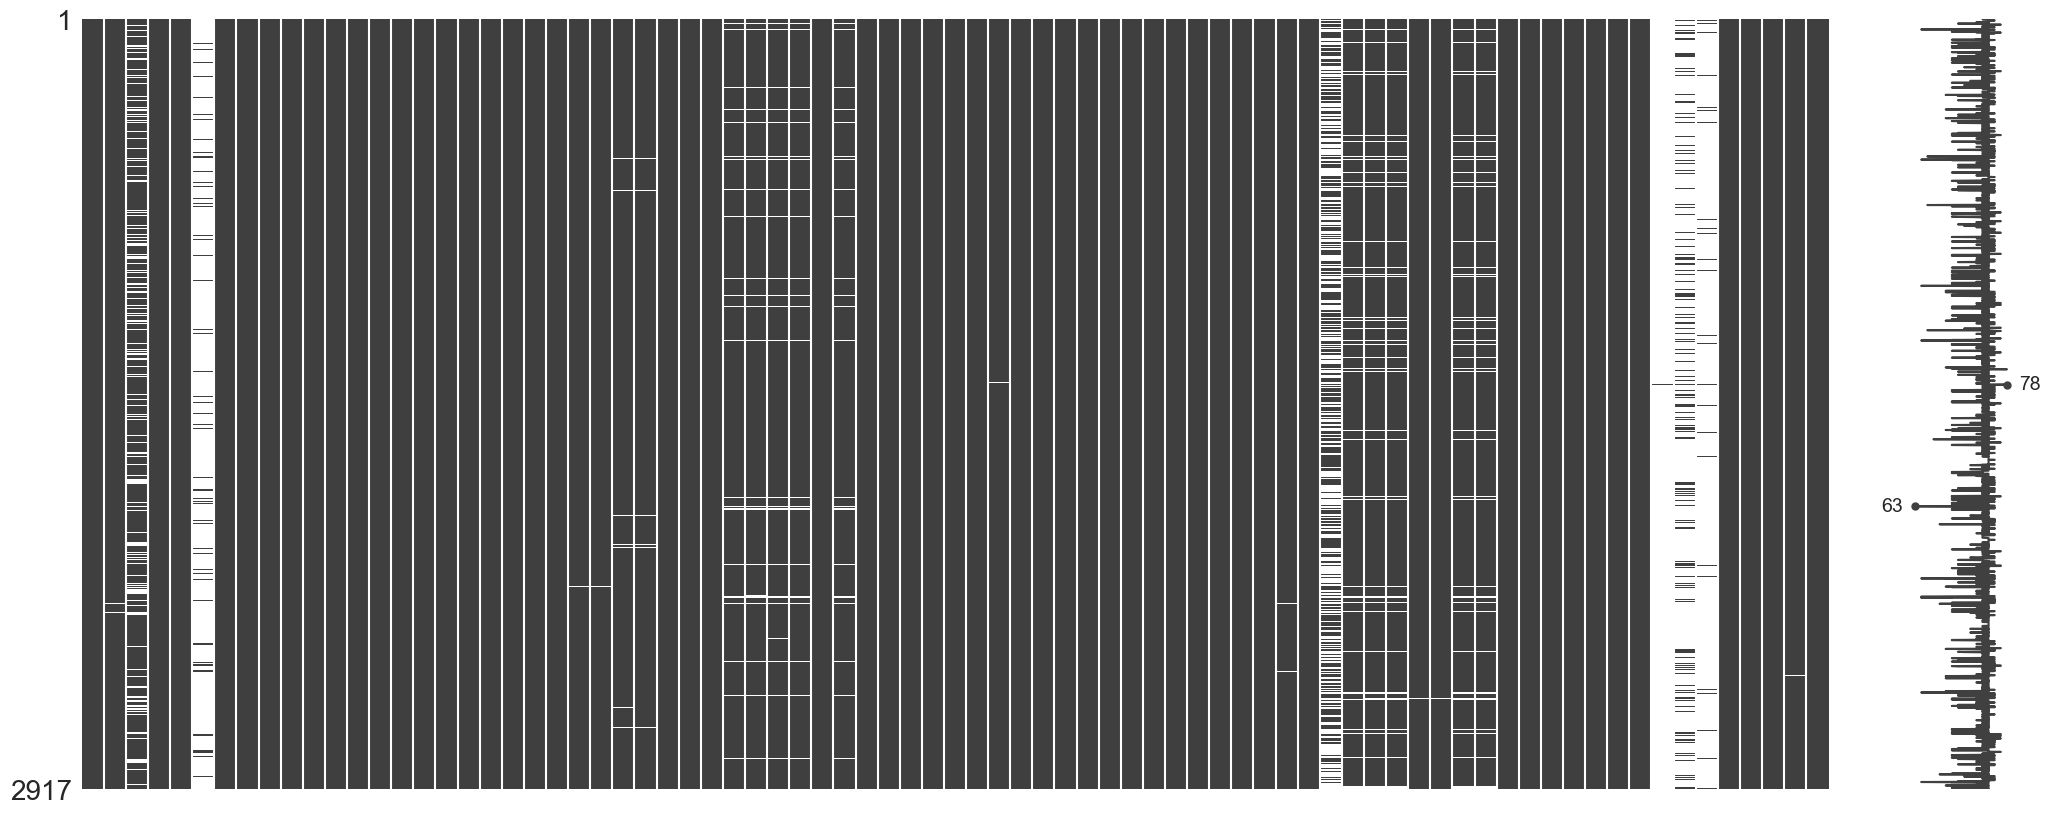

In [218]:
msno.matrix(df_new)

In [277]:
print(list(missing_counts.items()))

[('PoolQC', 2908), ('MiscFeature', 2812), ('Alley', 2719), ('Fence', 2346), ('FireplaceQu', 1420), ('LotFrontage', 486), ('GarageYrBlt', 159), ('GarageFinish', 159), ('GarageQual', 159), ('GarageCond', 159), ('GarageType', 157), ('BsmtExposure', 82), ('BsmtCond', 82), ('BsmtQual', 81), ('BsmtFinType2', 80), ('BsmtFinType1', 79), ('MasVnrType', 24), ('MasVnrArea', 23), ('MSZoning', 4), ('Functional', 2), ('BsmtHalfBath', 2), ('BsmtFullBath', 2), ('Utilities', 2), ('SaleType', 1), ('BsmtFinSF1', 1), ('KitchenQual', 1), ('GarageCars', 1), ('BsmtUnfSF', 1), ('TotalBsmtSF', 1), ('Exterior2nd', 1), ('Exterior1st', 1), ('GarageArea', 1), ('Electrical', 1), ('BsmtFinSF2', 1)]


The following categoritcal NaNs we will convert to a new category 'Not Available':

In [279]:
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'MSSubClass', 'MasVnrType', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_new[col] = df_new[col].fillna("Not Available")

The following numeric NaNs we will convert to 0:

In [280]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'MasVnrArea'):
    df_new[col] = df_new[col].fillna(0)

We'll just drop Utilities feature:

In [281]:
df_new = df_new.drop(['Utilities'], axis=1)

The missing LotFrontage we will fill with the median value:

In [282]:
df_new["LotFrontage"] = df_new.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

For those features that have only a few mission values we will do mode imputation:

In [285]:
for col in ('Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    print(df_new[col].value_counts())

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
WD       2525
New       237
COD 

In [286]:
for col in ('Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    df_new[col] = df_new[col].fillna(df_new[col].mode()[0])

And we have no more NaNs:

<Axes: >

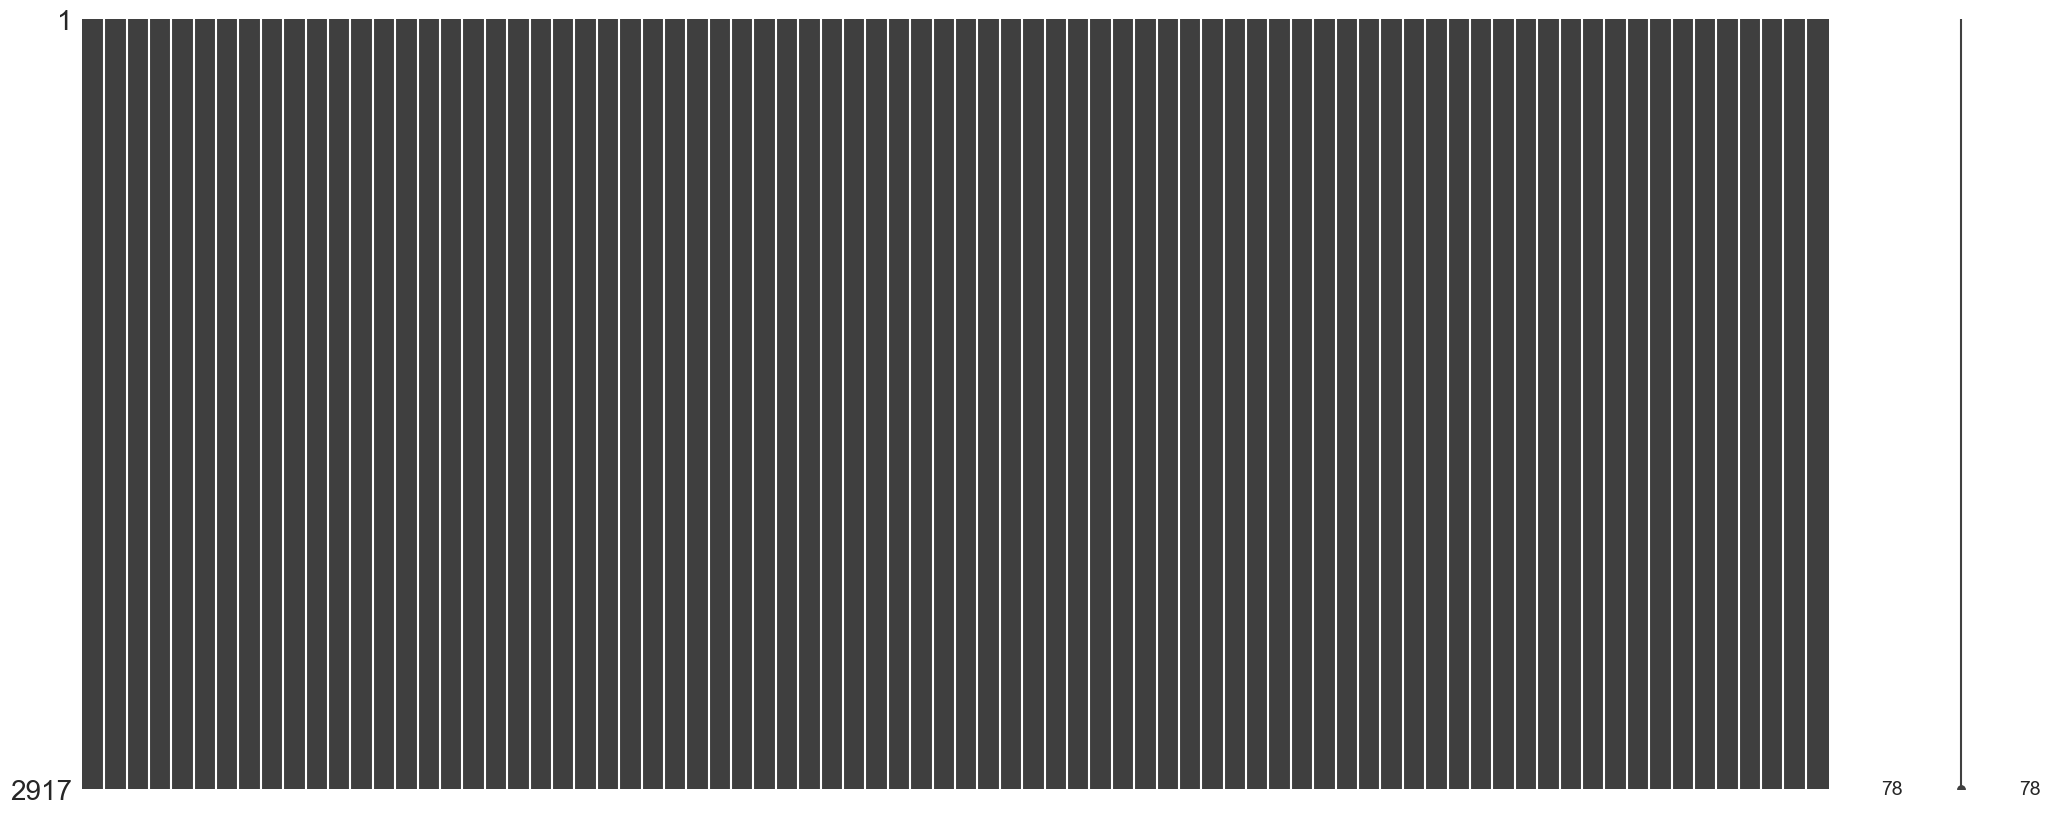

In [287]:
msno.matrix(df_new)

## FEATURE ENGINEERING

In [288]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2917 non-null   object 
 2   LotFrontage    2917 non-null   float64
 3   LotArea        2917 non-null   float64
 4   Street         2917 non-null   object 
 5   Alley          2917 non-null   object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   LotConfig      2917 non-null   object 
 9   LandSlope      2917 non-null   object 
 10  Neighborhood   2917 non-null   object 
 11  Condition1     2917 non-null   object 
 12  Condition2     2917 non-null   object 
 13  BldgType       2917 non-null   object 
 14  HouseStyle     2917 non-null   object 
 15  OverallQual    2917 non-null   int64  
 16  OverallCond    2917 non-null   int64  
 17  YearBuilt      2917 non-null   int64  
 18  YearRemo

In [289]:
df_new['MSSubClass']

0        60
1        20
2        60
3        70
4        60
       ... 
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: int64

In [292]:
df_new['OverallCond']

0       5
1       8
2       5
3       5
4       5
       ..
2912    7
2913    5
2914    7
2915    5
2916    5
Name: OverallCond, Length: 2917, dtype: int64

The follwoing numeric features are actually more of a categorical features so we convert them to strings for later label encoding:

In [300]:
df_new['YrSold']

0       2
1       1
2       2
3       0
4       2
       ..
2912    0
2913    0
2914    0
2915    0
2916    0
Name: YrSold, Length: 2917, dtype: int64

In [293]:
df_new['MSSubClass'] = df_new['MSSubClass'].apply(str)
df_new['OverallCond'] = df_new['OverallCond'].astype(str)
df_new['YrSold'] = df_new['YrSold'].astype(str)
df_new['MoSold'] = df_new['MoSold'].astype(str)

We now one-hot encode the categorical features:

In [295]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

le = LabelEncoder()

for i in cols:
    df_new[i] = le.fit_transform(df_new[[i]])

In [299]:
df_new['YrSold']

0       2
1       1
2       2
3       0
4       2
       ..
2912    0
2913    0
2914    0
2915    0
2916    0
Name: YrSold, Length: 2917, dtype: int64

We now look into skewness of the numeric features:

In [304]:
numeric_feats = df_new.dtypes[df_new.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [308]:
skewed_feats = df_new[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats = skewed_feats[(abs(skewed_feats) > 0.75)]
skewed_feats

MiscVal          21.940
PoolArea         17.689
LowQualFinSF     12.085
3SsnPorch        11.372
LandSlope         4.973
KitchenAbvGr      4.301
BsmtFinSF2        4.145
EnclosedPorch     4.002
ScreenPorch       3.945
BsmtHalfBath      3.930
MasVnrArea        2.622
OpenPorchSF       2.529
WoodDeckSF        1.845
LotArea           1.686
BsmtFinSF1        0.981
BsmtUnfSF         0.920
2ndFlrSF          0.862
BsmtExposure     -1.117
KitchenQual      -1.450
ExterQual        -1.800
Fence            -1.993
ExterCond        -2.496
BsmtCond         -2.861
PavedDrive       -2.978
BsmtFinType2     -3.043
GarageQual       -3.073
CentralAir       -3.458
GarageCond       -3.594
GarageYrBlt      -3.905
Functional       -4.054
Street          -15.495
PoolQC          -21.218
dtype: float64

In [311]:
skewness = pd.DataFrame({'Skew': skewed_feats})
print(f"There are {skewness.shape[0]} skewed numerical features to Box Cox transform")

There are 32 skewed numerical features to Box Cox transform


In [312]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for i in skewed_features:
    df_new[i] = boxcox1p(df_new[i], lam)

In [316]:
skewed_feats1 = df_new[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_feats1

PoolArea         15.760
3SsnPorch         8.922
LowQualFinSF      8.741
MiscVal           5.595
LandSlope         4.530
BsmtHalfBath      3.787
KitchenAbvGr      3.697
ScreenPorch       2.977
BsmtFinSF2        2.563
EnclosedPorch     2.024
TotRmsAbvGrd      0.749
Fireplaces        0.725
1stFlrSF          0.703
HalfBath          0.697
TotalBsmtSF       0.672
LotFrontage       0.669
MasVnrArea        0.637
BsmtFullBath      0.622
GrLivArea         0.597
OverallCond       0.569
HeatingQC         0.486
FireplaceQu       0.333
2ndFlrSF          0.329
BedroomAbvGr      0.327
WoodDeckSF        0.224
GarageArea        0.217
OverallQual       0.190
FullBath          0.166
MSSubClass        0.140
YrSold            0.132
OpenPorchSF       0.099
BsmtFinType1      0.084
LotArea           0.061
GarageCars       -0.219
YearRemodAdd     -0.450
BsmtQual         -0.488
BsmtFinSF1       -0.489
YearBuilt        -0.599
GarageFinish     -0.610
LotShape         -0.619
MoSold           -0.646
Alley           

And let's one-hot encode the categorical features:

In [317]:
df_new = pd.get_dummies(df_new)
print(df_new.shape)
train = df_new[:ntrain]
test = df_new[ntrain:]
print(train.shape)
print(test.shape)

(2917, 220)
(1458, 220)
(1459, 220)


## REGRESSION MODELS

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 

In [ ]:
xgbr = XGBRegressor(learning_rate=0.01,
                       n_estimators=8000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [ ]:
lgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=6000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [ ]:
rfr = RandomForestRegressor(n_estimators=7000,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 123).get_n_splits(train.values)

In [ ]:
gbr_mse_cv_scores = - cross_val_score(gbr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
gbr_rmse_score = np.sqrt(gbr_mse_cv_scores)

xgbr_mse_cv_scores = - cross_val_score(xgbr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
xgbr_rmse_score = np.sqrt(xgbr_mse_cv_scores)

lgbm_mse_cv_scores = - cross_val_score(lgbm, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
lgbm_rmse_score = np.sqrt(lgbm_mse_cv_scores)

rfr_mse_cv_scores = - cross_val_score(rfr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
rfr_rmse_score = np.sqrt(rfr_mse_cv_scores)

print('Gradient Boosting Regressor CV RMSE Score :', gbr_rmse_score.mean())
print('XGBoost Regressor CV RMSE Score :', xgbr_rmse_score.mean())
print('LightGBM Regressor CV RMSE Score :', lgbm_rmse_score.mean())
print('Random Forest Regressor CV RMSE Score :', rfr_rmse_score.mean())

In [ ]:
gbr.fit(train, y_train)
gbr_train_pred = gbr.predict(train)
gbr_pred = np.expm1(gbr.predict(test.values))
rmse_gbr = np.sqrt(mean_squared_error(y_train,gbr_train_pred))
print(rmse_gbr)

In [ ]:
xgbr.fit(train,y_train)
xgbr_train_pred = xgbr.predict(train)
xgbr_pred = np.expm1(xgbr.predict(test.values))
rmse_xgbr = np.sqrt(mean_squared_error(y_train,xgbr_train_pred))
print(rmse_xgbr)

In [ ]:
lgbm.fit(train, y_train)
lgbm_train_pred = lgbm.predict(train)
lgbm_pred = np.expm1(lgbm.predict(test.values))
rmse_lgbm = np.sqrt(mean_squared_error(y_train,lgbm_train_pred))
print(rmse_lgbm)

In [ ]:
rfr.fit(train, y_train)
rfr_train_pred = rfr.predict(train)
rfr_pred = np.expm1(rfr.predict(test.values))
rmse_rfr = np.sqrt(mean_squared_error(y_train,rfr_train_pred))
print(rmse_rfr)

In [ ]:
models = ['Gradient Boosting', 'XGBoost', 'LightGBM', 'Random Forest']

rmse_scores = [rmse_gbr, rmse_xgbr, rmse_lgbm, rmse_rfr]

model_scores = pd.DataFrame({
    
    'Regression Models' : models,
    'RMSE Scores' : rmse_scores
    
})

results = model_scores.sort_values('RMSE Scores', ascending = True, ignore_index= True)
results

In [ ]:
sns.catplot(x = 'Regression Models', y = 'RMSE Scores', order = ['LightGBM', 'Gradient Boosting', 'Random Forest', 'XGBoost'],
           data = results, kind='point', color = 'Navy')
plt.title('RMSE Scores of Advanced Regression Models')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
results.to_csv('final_submission.csv', index = 'None')

## CONCLUSION

**Based on the modelling with advanced regression algorithms, LightGBM seems to have the minimum RMSE score which makes it the best for predictions in this dataset.**